In [33]:
import cv2
import numpy as np
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import pytesseract
import matplotlib.pyplot as plt
import requests
# pip install pytesseract
import easyocr

In [2]:
# plot images side by side on graphs
def plot_images(img1, img2, title1="", title2=""):
    fig = plt.figure(figsize=[15,15])
    ax1 = fig.add_subplot(121)
    ax1.imshow(img1, cmap="gray")
    ax1.set(xticks=[], yticks=[], title=title1)
    
    ax2 = fig.add_subplot(122)
    ax2.imshow(img2, cmap="gray")
    ax2.set(xticks=[], yticks=[], title=title2)

In [3]:
path = "./img5.jpg"

In [4]:
image = cv2.imread(path)

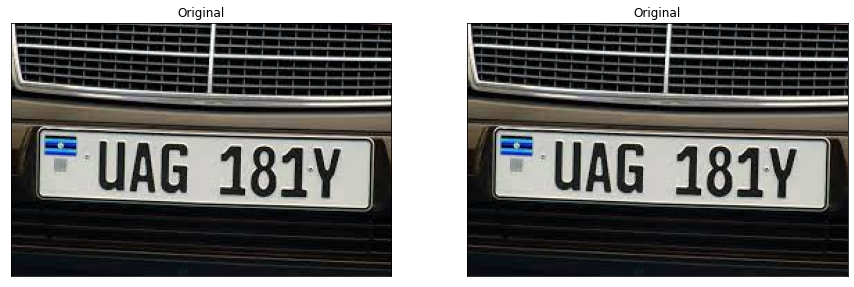

In [5]:
plot_images(image, image, title1="Original", title2="Original")

In [6]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

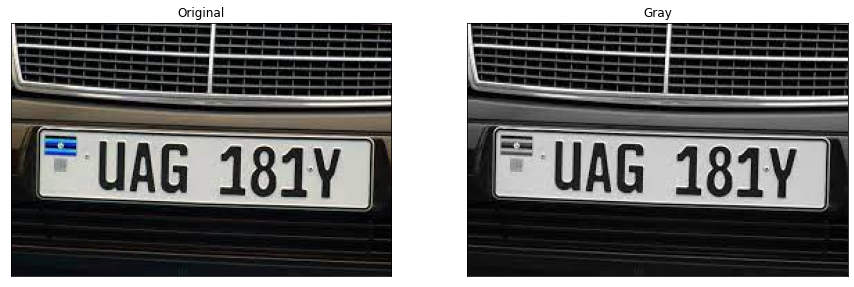

In [7]:
plot_images(image, gray, title1="Original", title2="Gray")

In [8]:
blur = cv2.bilateralFilter(gray, 11, 90, 90)

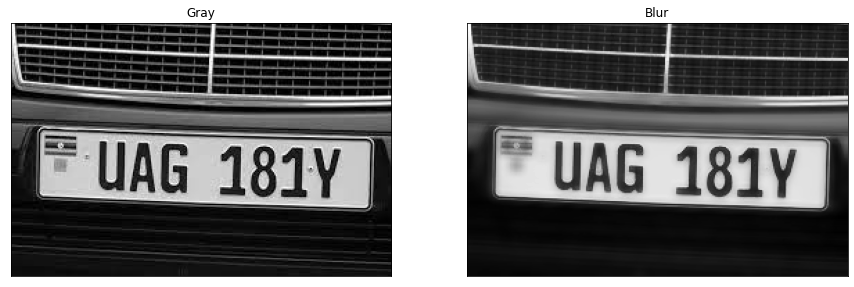

In [9]:
plot_images(gray, blur, title1="Gray", title2="Blur")

In [10]:
edges = cv2.Canny(blur, 30, 200)

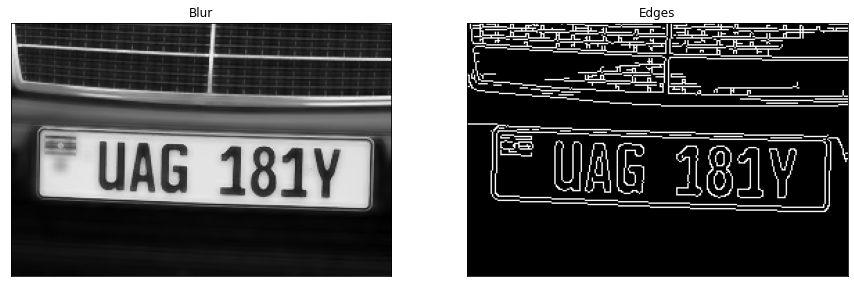

In [11]:
plot_images(blur, edges, title1="Blur", title2="Edges")

In [12]:
cnts, new = cv2.findContours(edges.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

In [13]:
image_copy = image.copy()

In [14]:
_ = cv2.drawContours(image_copy, cnts, -1, (255, 0, 255), 2)

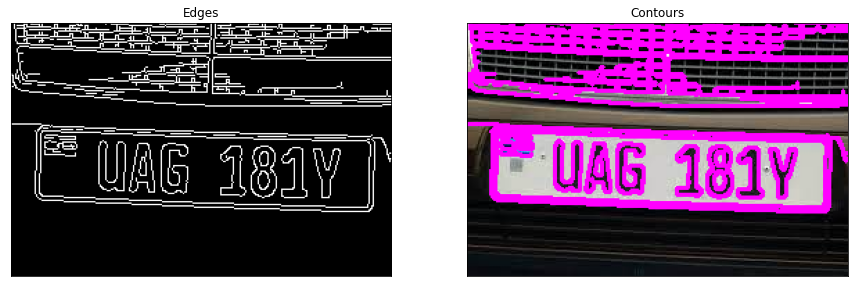

In [15]:
plot_images(edges, image_copy, title1="Edges", title2="Contours")

In [16]:
print(len(cnts))

110


In [17]:
cnts = sorted(cnts, key=cv2.contourArea, reverse=True)[:10]

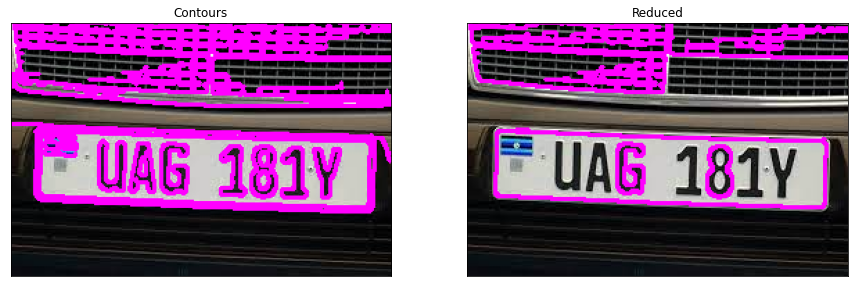

In [18]:
image_reduced_cnts = image.copy()
_ = cv2.drawContours(image_reduced_cnts, cnts, -1, (255, 0, 255), 2)
plot_images(image_copy, image_reduced_cnts, title1="Contours", title2="Reduced")

In [19]:
print(len(cnts))

10


In [20]:
plate = None
for c in cnts:
    perimeter = cv2.arcLength(c, True)
    edges_count = cv2.approxPolyDP(c, 0.02 * perimeter, True)
    if len(edges_count) == 4:
        x,y,w,h = cv2.boundingRect(c)
        plate = image[y:y+h, x:x+w]
        break
        
cv2.imwrite('plate.png', plate)

True

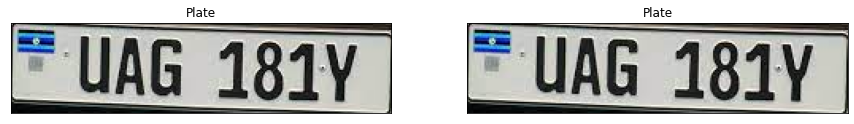

In [21]:
plot_images(plate, plate, title1="Plate", title2="Plate")

In [22]:
#import pytesseract
# text = pytesseract.image_to_string(plate, lang="eng")

# print(text)
reader = easyocr.Reader(['en'])
result = reader.readtext(plate)
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.
/Users/odeke/opt/anaconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:252: UserWarning: Accessing the model URLs via the internal dictionary of the module is deprecated since 0.13 and will be removed in 0.15. Please access them via the appropriate Weights Enum instead.
  warnings.warn(
/Users/odeke/opt/anaconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/Users/odeke/opt/anaconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
[W NNPACK.cpp:51] Could not initialize NNPACK! Reason: Unsupported hardware.


[([[36, 2], [224, 2], [224, 56], [36, 56]], 'uAG 181v', 0.3333502143242278)]

In [23]:
#text = result[0][-2]
text = result[0][-2]
text.upper()

'UAG 181V'

In [40]:
number_plate = text.upper()
endpoint = "http://localhost:8000/vehicle"
get_response = requests.post(endpoint, json={"number_plate": number_plate})
print(get_response.json())

{'message': 'Vehicle created'}


In [41]:
#Updating the vehicle's bill at the gate
endpoint = "http://localhost:8000/vehicle/update"
update_response = requests.put(endpoint, json={"number_plate": number_plate})
print(update_response)

<Response [200]>


In [43]:
#Making dummy payment
endpoint = "http://localhost:8000/vehicle/makePayment"
update_response = requests.post(endpoint, json={"number_plate": number_plate})
print(update_response)

<Response [201]>
